# Introduction to Qiskit

Qiskit [kiss-kit] is an open-source SDK for working with quantum computing.

Qiskit has different components:

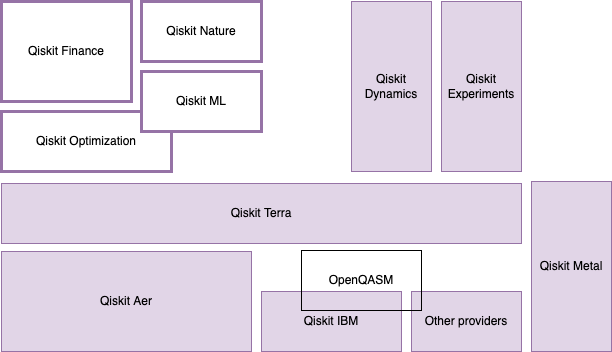

 * **Qiskit Terra**, the core module in which all of the others are based.
 * **Qiskit Aer**, the module which contains all simulators.
 * **Qiskit Application packages**, these are 4 modules, **Machine Learning**, **Nature**, **Finance**, and **Optimization**, they target specific domains and plug into the tools used by experts.
 * **Qiskit Dynamics**, provides access to different numerical methods for solving differential equations
 * **Qiskit IBM** Quantum Provider, the module that enables us to access real quantum hardware in the cloud.
 * **Qiskit Experiments** (aka Ignis), the module that contains all the required tools to implement error mitigation techniques.   
 * **Qiskit Metal**, a framework for engineering and designing superconducting quantum devices.


### installation

For this talk, we need Qiskit terra, aer, and the provider

```
pip install qiskit-terra qiskit-aer qiskit-ibmq-provider
```

In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

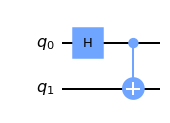

In [13]:
circuit.draw()

In [19]:
circuit.draw('latex_source')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{H}} & \\ctrl{1} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\qw & \\targ & \\qw & \\qw\\\\\n\\\\ }}\n\\end{document}'

In [15]:
# Change the default drawer

from qiskit import user_config
user_config.set_config('circuit_drawer', 'mpl')
user_config.set_config('displaycolor', {'cx':'#FF00FF'})

QiskitUserConfigError: 'displaycolor is not a valid user config.'

In [16]:
from qiskit import Aer

sim = Aer.get_backend('unitary_simulator')
result = sim.run(circuit).result()
matrix = result.get_unitary()
matrix

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [-0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
        -0.        +0.00000000e+00j, -0.        +0.00000000e+00j]])

In [17]:
from qiskit.visualization import array_to_latex
array_to_latex(result.get_unitary())

<IPython.core.display.Latex object>

In [20]:
sim = Aer.get_backend('statevector_simulator')
result = sim.run(circuit).result()
psi  = result.get_statevector(circuit)
array_to_latex(psi)

<IPython.core.display.Latex object>

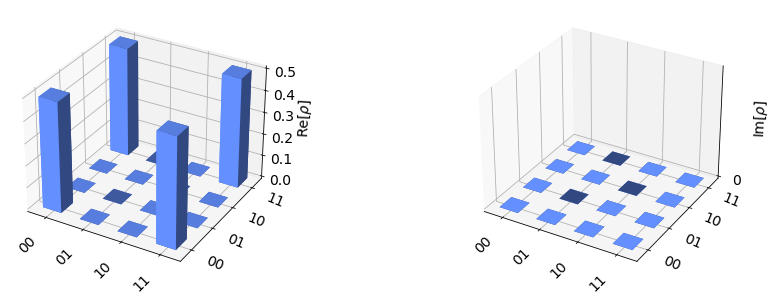

In [21]:
from qiskit.visualization import plot_state_city
plot_state_city(psi)

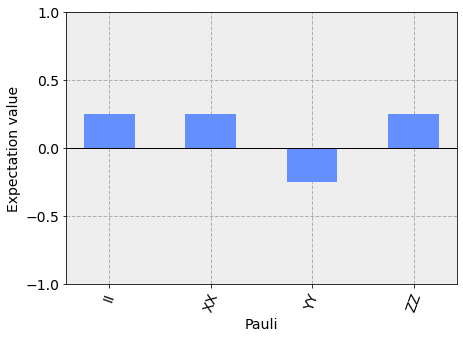

In [22]:
from qiskit.visualization import plot_state_paulivec

plot_state_paulivec(psi)

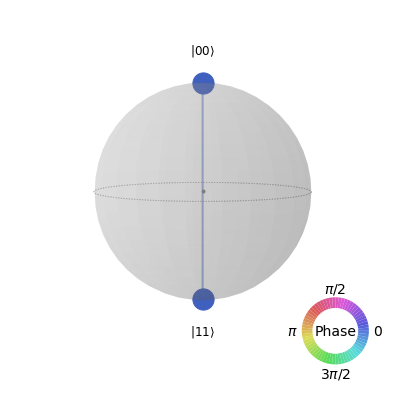

In [23]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(psi)

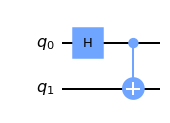

In [24]:
circuit.draw()

In [25]:
# Measure the circuit

circuit.measure_all()  # <- this is important!

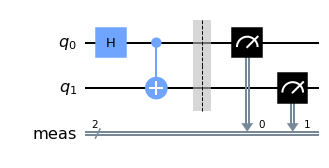

In [26]:
circuit.draw()

In [27]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit).result()
counts = result.get_counts()
counts

{'11': 502, '00': 522}

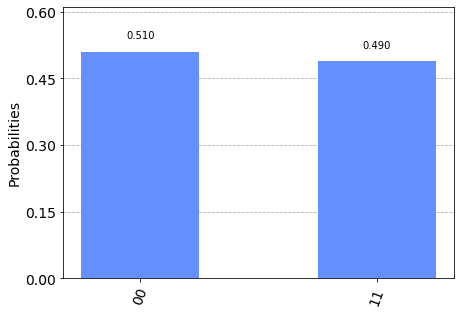

In [28]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

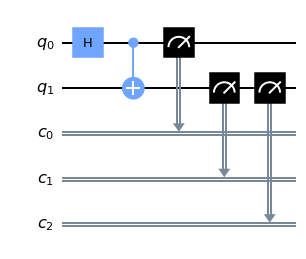

In [32]:
circuit1 = QuantumCircuit(2, 3)
circuit1.h(0)
circuit1.cx(0,1)
circuit1.measure(0, 0)
circuit1.measure(1, 1)
circuit1.measure(1, 2)
circuit1.draw(cregbundle=False)

In [31]:
result = sim.run(circuit1).result()
counts = result.get_counts()
counts

{'000': 515, '111': 509}

## Let's run it on real hardware!

Get your access token

Log in https://quantum-computing.ibm.com/

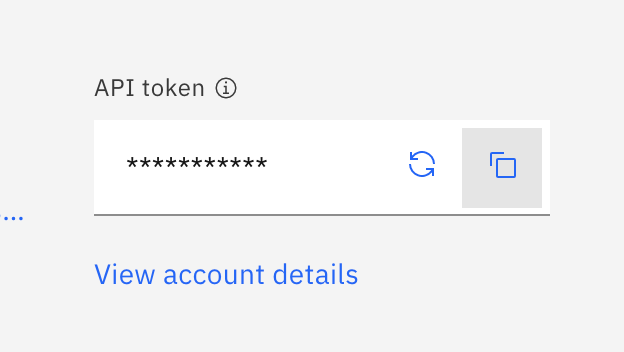

In [33]:
from qiskit import IBMQ

# IBMQ.save_account(<paste API token here>)
provider = IBMQ.load_account()
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('ibmq_armonk', 1),
 ('ibmq_santiago', 5),
 ('ibmq_bogota', 5),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibmq_manila', 5)]

In [34]:
provider = IBMQ.get_provider("ibm-q-internal")                  
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('ibmq_armonk', 1),
 ('ibmq_montreal', 27),
 ('ibmq_toronto', 27),
 ('ibmq_santiago', 5),
 ('ibmq_bogota', 5),
 ('ibmq_manhattan', 65),
 ('ibmq_casablanca', 7),
 ('ibmq_sydney', 27),
 ('ibmq_mumbai', 27),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('ibmq_guadalupe', 16),
 ('ibmq_brooklyn', 65),
 ('ibmq_jakarta', 7),
 ('ibmq_manila', 5),
 ('ibm_hanoi', 27),
 ('ibm_lagos', 7),
 ('ibm_cairo', 27),
 ('ibm_perth', 7)]

In [35]:
import qiskit.tools.jupyter

%qiskit_backend_overview

In [36]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>

In [37]:
# a remainder
result = sim.run(circuit).result()
counts = result.get_counts()
counts

{'00': 533, '11': 491}

In [38]:
job = backend.run(circuit)

In [39]:
job.status()

<JobStatus.ERROR: 'job incurred error'>

In [40]:
job.result()

IBMQJobFailureError: "Unable to retrieve result for job 61975693329f0f22c1491738. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

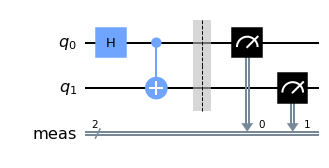

In [41]:
circuit.draw('mpl')

### We need to transpile it

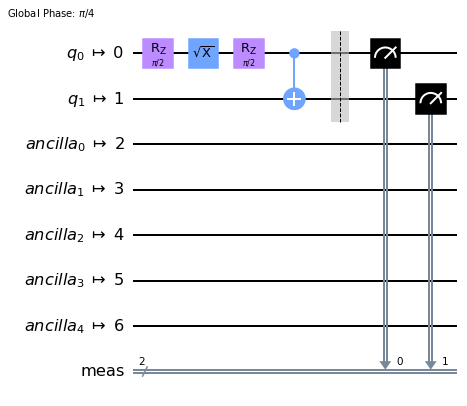

In [42]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

In [43]:
job = backend.run(transpiled_circuit)

In [46]:
job.status()

<JobStatus.RUNNING: 'job is actively running'>

In [47]:
result = job.result()
counts = result.get_counts()
counts

{'00': 1860, '01': 100, '10': 96, '11': 1944}

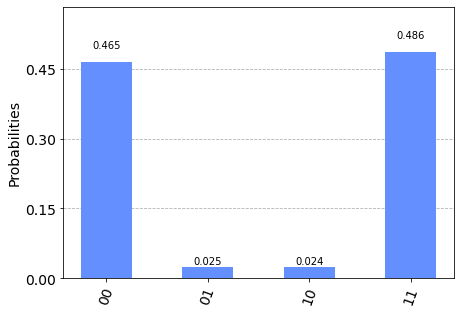

In [48]:
plot_histogram(counts)

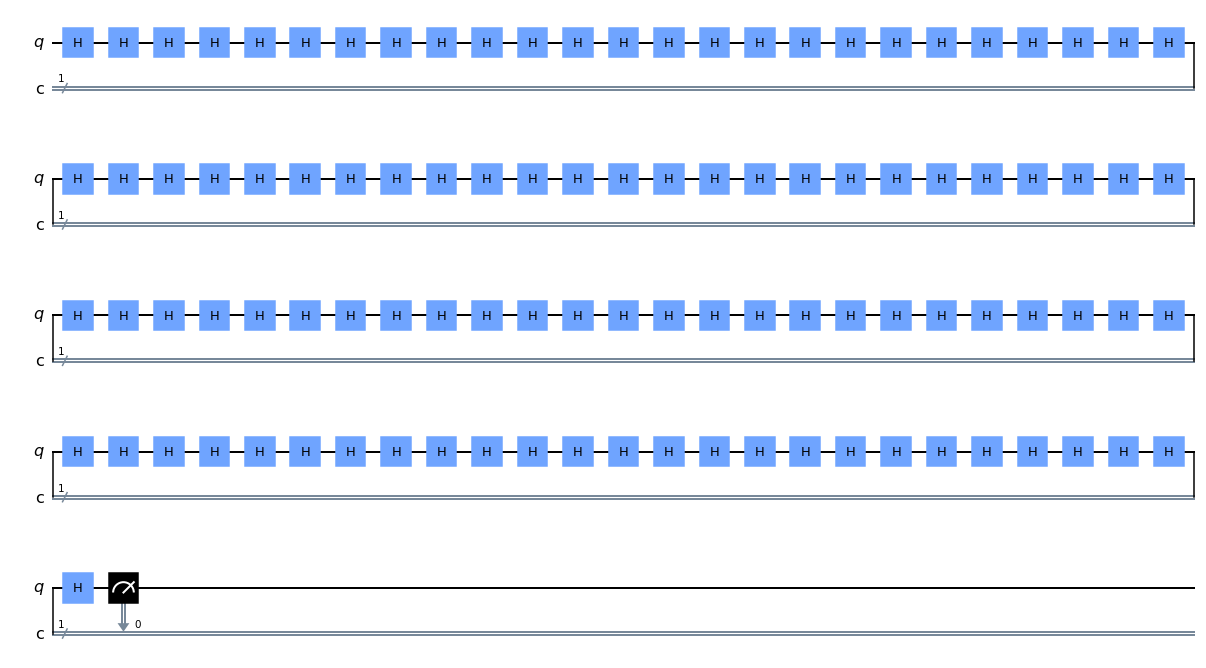

In [56]:
qc = QuantumCircuit(1, 1)
for _ in range(100):
    qc.h(0)
qc.h(0)
qc.measure(0, 0)
qc.draw()

In [57]:
job = backend.run(transpile(qc, backend, optimization_level=0))

In [ ]:
result = job.result()
counts = result.get_counts()
counts

## Transpiler

In [ ]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

In [ ]:
# a slightly more interesting example:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()

display(circuit.draw())
transpiled = transpile(circuit, backend)
transpiled.draw(idle_wires=False, fold=-1)

In [ ]:
# initial layout

transpiled = transpile(circuit, backend, initial_layout=[0,2,3])
display(plot_circuit_layout(transpiled, backend))
plot_gate_map(backend)

In [ ]:
transpiled.draw(idle_wires=False, fold=-1)

In [ ]:
level0 = transpile(circuit, backend, optimization_level=0)
level1 = transpile(circuit, backend, optimization_level=1)
level2 = transpile(circuit, backend, optimization_level=2)
level3 = transpile(circuit, backend, optimization_level=3)

In [ ]:
for level in [level0, level1, level2, level3]:
    print(level.count_ops()['cx'], level.depth())

In [ ]:
# transpiling is a stochastic process 

transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=0)
transpiled.depth()

In [ ]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=1)
transpiled.depth()

In [ ]:
# Playing with other transpiler options
# (without a backend)

In [ ]:
transpiled = transpile(circuit)
transpiled.draw(fold=-1)

In [ ]:
# target basis gates
transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw(fold=-1)

In [ ]:
# set a coupling map

from qiskit.transpiler import CouplingMap

transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]))
transpiled.draw(fold=-1)

In [ ]:
# set an initial_layout in the coupling map

transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2])
transpiled.draw(fold=-1)

In [ ]:
# set an initial_layout in the coupling map with basis gates

transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p']
                      )
transpiled.draw(fold=-1)

In [ ]:
# how to reduce the approximation dial

transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.99,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.01,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

# The pass manager

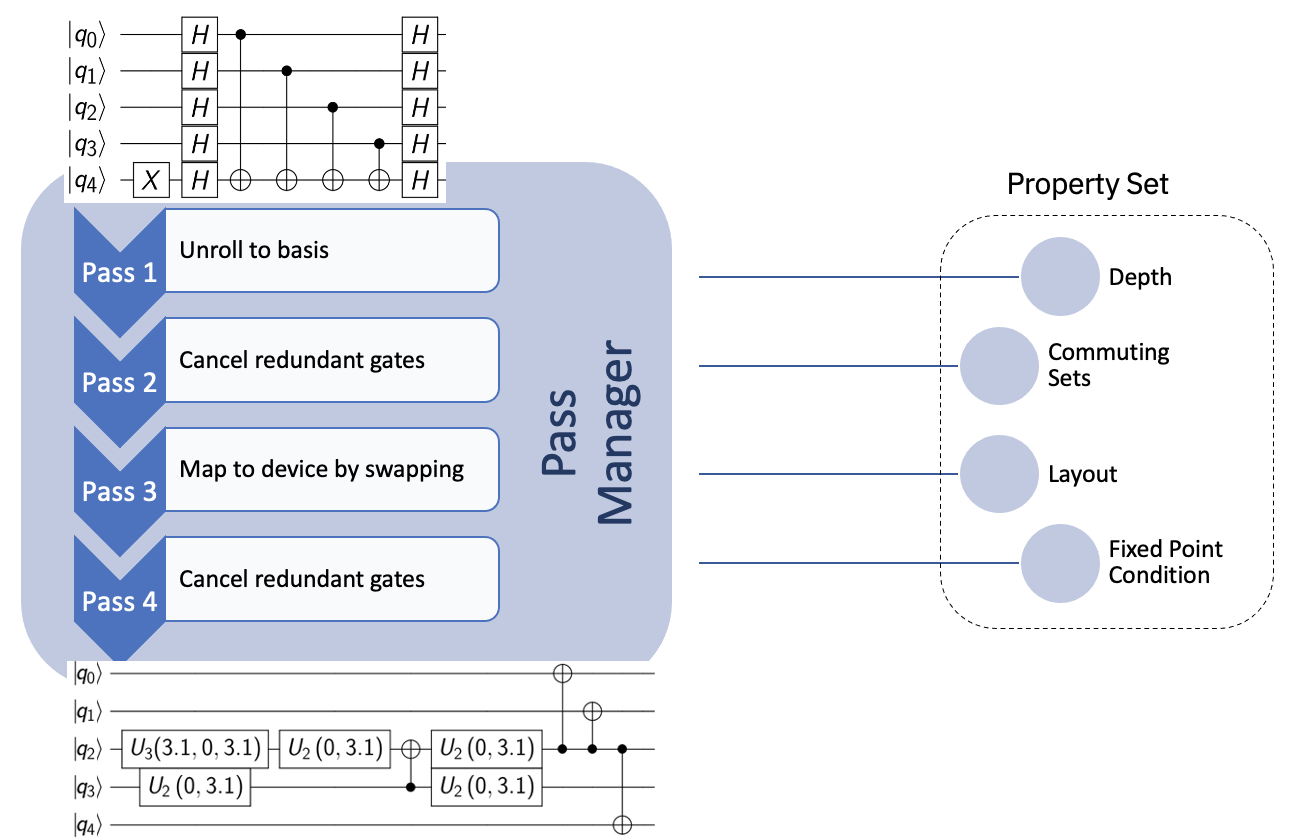

In [ ]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import CheckMap, CheckCXDirection

coupling_map = CouplingMap([[0,1], [1,2]])
pm = PassManager()
pm.append(CheckMap(coupling_map))
pm.append(CheckCXDirection(coupling_map))

In [ ]:
circuit = QuantumCircuit(3)
circuit.cx(0,1)
circuit.cx(1,2)

pm.run(circuit)
print('right qubits?', pm.property_set['is_swap_mapped'])
print('right direction?', pm.property_set['is_direction_mapped'])

In [ ]:
circuit = QuantumCircuit(3)
circuit.cx(0,1)
circuit.cx(2,1)

pm.run(circuit)
print('right qubits?', pm.property_set['is_swap_mapped'])
print('right direction?', pm.property_set['is_direction_mapped'])

In [ ]:
from qiskit.transpiler.passes import GateDirection

def needs_direction(property_set):
    return not property_set["is_direction_mapped"]

pm.append(GateDirection(coupling_map), condition=needs_direction)

result = pm.run(circuit)
result.draw()

## Single passes

In [ ]:
# optimization
from qiskit.transpiler.passes import CXCancellation

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 1)

result = CXCancellation()(circuit)
result.draw()